In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib import rcParams
import numpy as np
import math
from PIL import Image
from os import path
import matplotlib.pyplot as plt
import random

sns.set(style="whitegrid", palette="colorblind", color_codes=True, font_scale=1.4, font='NanumGothic' )
rcParams['font.family'] = 'NanumGothic'

%matplotlib inline

In [2]:
## data load

name_ds = pd.read_pickle('./resource/name_ds.pkl')
words_ds = pd.read_pickle('./resource/words_ds.pkl')
repo_meta_ds = pd.read_pickle('./resource/repo_ds.pkl')
pos_tagged_ds = pd.read_pickle('./resource/pos_tagged_ds.pkl')

In [153]:
import networkx as nx
def drawNetwork( edges, nodes, title, min_display=0 , graph_k=None) :
    # draw graph
    G=nx.Graph()
    for (n,v) in edges.items():
        G.add_edge(n[0],n[1],weight=v)

    pos=nx.spring_layout(G, k=graph_k) # positions for all nodes
    plt.figure(3,figsize=(17,12))
    plt.xlim(-.02,1.02)
    plt.ylim(-.05,1.05)
    plt.title(title, fontsize=14)
    ax = nx.draw_networkx_nodes(G, pos,
                       nodelist=nodes.keys(),
                       node_color='rgbcmy',
                       node_size=[ v for v in nodes.values()],
                       alpha=0.8)

    nx.draw_networkx_edges(G, pos, alpha=0.4, edgelist=edges.keys(), width=[n/15 for n in edges.values()])
    
    
    labels = {} 
    for (n,v) in nodes.items():
        labels[n] =  '' if v<min_display else n.replace(' ','\n')
    ax = nx.draw_networkx_labels(G, pos, labels, font_size=12, font_color="k")
    #nx.draw(G, fontsize=10)


In [145]:
from collections import defaultdict
nodes = defaultdict(int)
edges = defaultdict(int)

for tokens in  pos_tagged_ds.tokens:
    size = len(tokens)
    for i in range(size):
        nodes[tokens[i]] += 1
        for j in range(i,size):
            if tokens[i] == tokens[j]:
                continue
            if tokens[i] < tokens[j] :
                edges[(tokens[i], tokens[j])] += 1
            else:
                edges[(tokens[j], tokens[i])] += 1

In [166]:
## filetering 
filtered_nodes = {name:score for (name, score) in pd.DataFrame.from_dict(nodes,orient='index')\
                  .sort(0, ascending=False)[:200].reset_index().values}

In [167]:
filtered_edge = {}
for ((n1,n2), score) in edges.items():
    if (n1 in filtered_nodes) & (n2 in filtered_nodes) :
        filtered_edge[(n1,n2)] = score
        #print((n1,n2), score)


In [168]:
for key in filtered_nodes.keys():
    filtered_nodes[key] /=10
    
    

In [169]:
for key in filtered_edge.keys():
    filtered_edge[key] /=10
    
    

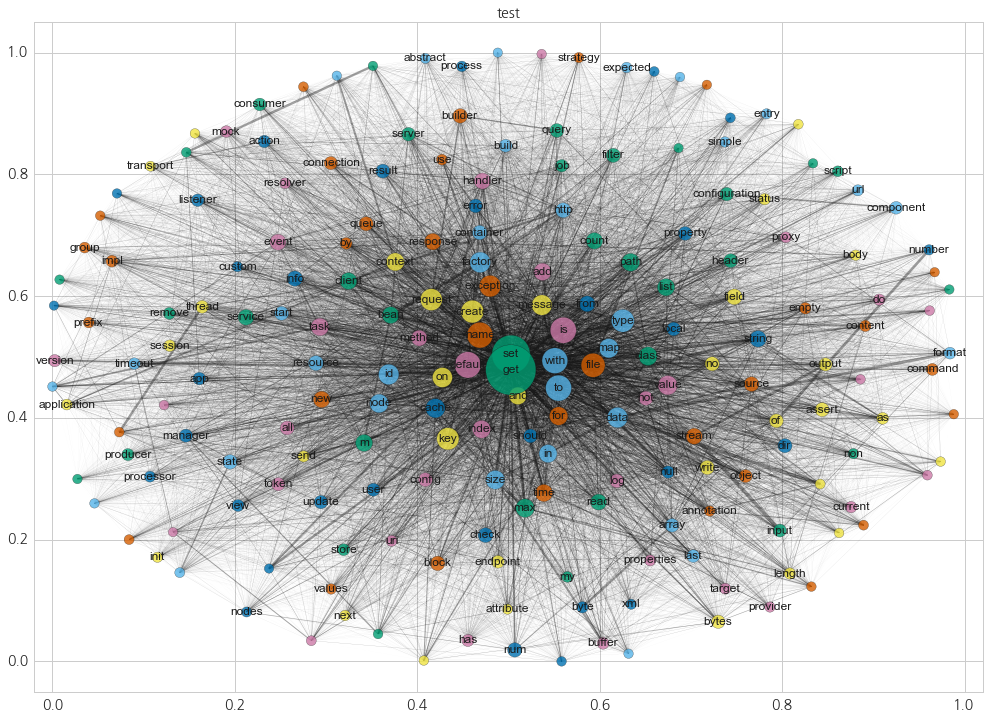

In [170]:
drawNetwork(filtered_edge, filtered_nodes, "test", min_display=100, graph_k=.5)

In [172]:
import gensim.models.word2vec as w2v

In [197]:
w2v_corpus = pos_tagged_ds[pos_tagged_ds['len']>2].tokens.values

In [198]:
model = w2v.Word2Vec(w2v_corpus, min_count=3)

In [206]:
model.most_similar(['a'])

[('value', 0.5967443585395813),
 ('empty', 0.5523901581764221),
 ('boolean', 0.5484553575515747),
 ('the', 0.5368999242782593),
 ('tz', 0.5278784036636353),
 ('element', 0.5266937017440796),
 ('an', 0.5254812836647034),
 ('invalid', 0.5214667916297913),
 ('must', 0.5213367938995361),
 ('ignored', 0.5153591632843018)]

In [200]:
model.syn0.shape

(6532, 100)

In [201]:
pos_tagged_ds

,len,tokens,pos,count,kind
0,1,[a],DT,21,class
1,1,[a],DT,13,function
2,1,[a],DT,22,variable
3,1,[a],DT,8,variable
4,2,"[a, record]",DT+NN,1,class
5,2,"[a, record]",DT+NN,1,function
6,2,"[a, capacity]",DT+NN,2,variable
7,1,[a],DT,1,function
8,1,[a],DT,6,variable
9,2,"[a, capacity]",DT+NN,2,variable
